In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel

In [2]:
data = pd.read_csv("C:/Users/Leckhasri/Desktop/New folder/diabetes prediction/diabetes_prediction_dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [5]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
data.drop(data.index[5000:100000], inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               5000 non-null   object 
 1   age                  5000 non-null   float64
 2   hypertension         5000 non-null   int64  
 3   heart_disease        5000 non-null   int64  
 4   smoking_history      5000 non-null   object 
 5   bmi                  5000 non-null   float64
 6   HbA1c_level          5000 non-null   float64
 7   blood_glucose_level  5000 non-null   int64  
 8   diabetes             5000 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 351.7+ KB


In [9]:
l=LabelEncoder()
data["gender"]=l.fit_transform(data["gender"])
data["smoking_history"]=l.fit_transform(data["smoking_history"])

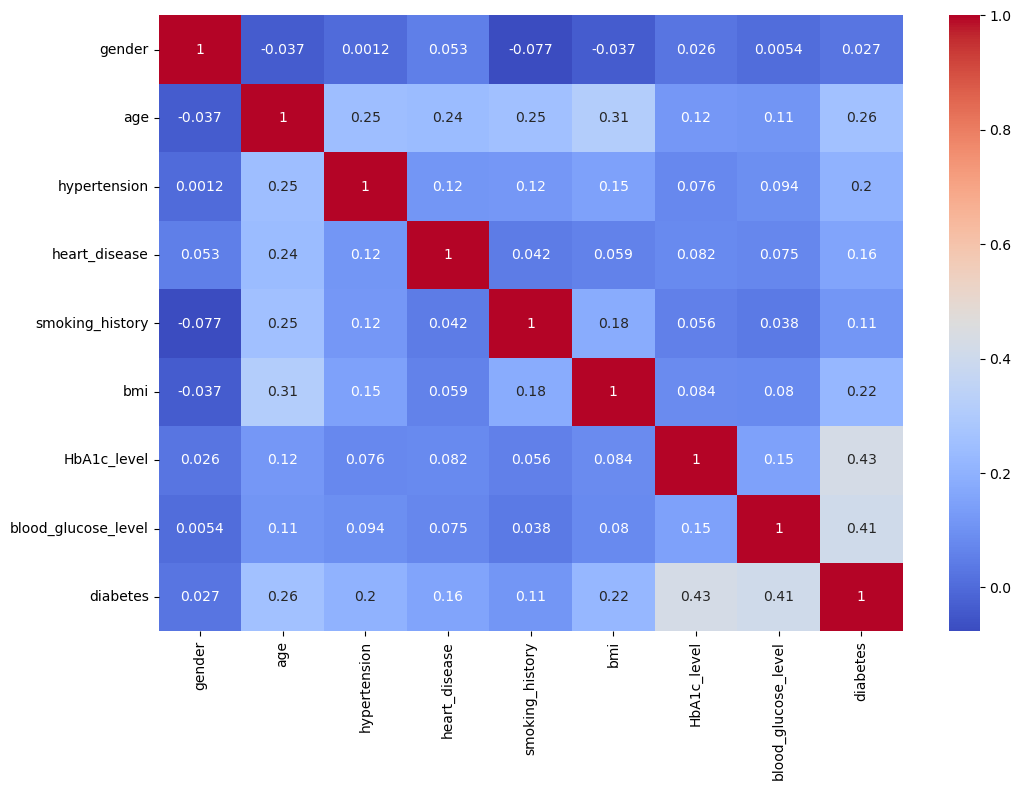

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(data).corr(), annot=True, cmap="coolwarm")
plt.show()

In [11]:
x=data.drop(["diabetes"],axis=1)
y=data["diabetes"]

In [12]:
x.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

feature_selector = RandomForestClassifier(n_estimators= 100,random_state=42)
feature_selector.fit(x_train, y_train)

sfm = SelectFromModel(feature_selector, threshold=0.02)  
x_train_select = sfm.transform(x_train)
x_test_select = sfm.transform(x_test)

selected_features = sfm.get_support(indices=True)
print(f"Selected Feature Indices: {selected_features}")

Selected Feature Indices: [1 2 4 5 6 7]


In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2']
}


In [ ]:
gridsearch = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
gridsearch.fit(x_train_select, y_train)

In [ ]:
best_rf = gridsearch.best_estimator_
print(f"Best Parameters: {gridsearch.best_params_}")

In [ ]:
rf_model = RandomForestClassifier(
    bootstrap=True,
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42  
)
rf_model.fit(x_train, y_train)ca
y_pred = rf_model.predict(x_test)

In [15]:
pred = feature_selector.predict(x_test)

acc = accuracy_score(y_test, pred)
print(f"Improved Accuracy: {acc}")

Improved Accuracy: 0.97


In [16]:
import numpy as np

sample = np.array([0,40,0,1,4,25.19,6.6,140]).reshape(1, -1)

prediction = feature_selector.predict(sample)

print("Predicted Class:", prediction)

Predicted Class: [1]


In [ ]:
# import joblib
# joblib.dump(rf_model, "model.pkl")